# Setup & Dependencies

In [2]:
!python.exe -m pip install --upgrade pip
!pip3 install -r ../../requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../../requirements.txt'


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings

nltk.download('stopwords')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noahd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\noahd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Reading the training data
df = pd.read_csv('../assets/datasets/IMDb_Dataset.csv')
print(df.shape)
df.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
# Descriptive statistics
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
# Sentiment distribution
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
# Reformating
# Rename 'sentiment' column to 'label'
df.rename(columns={'sentiment': 'label'}, inplace=True)
# Convert labels to binary values
df.label = df.label.apply(lambda x: 1 if x == 'positive' else 0)
df.head(10)

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [8]:
# Cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-letters and non-digits
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text.lower()

df.review = df.review.apply(clean_text)

In [9]:
#Remove stopwords
stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered = [word for word in words if word not in stopwords]
    return " ".join(filtered)

df.review = df.review.apply(remove_stopwords)

df.head(10)

,review,label
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
5,probably alltime favorite movie story selfless...,1
6,sure would like see resurrection dated seahunt...,1
7,show amazing fresh innovative idea 70s first a...,0
8,encouraged positive comments film looking forw...,0
9,like original gut wrenching laughter like movi...,1


In [10]:
# Lemmatize
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df.review = df.review.apply(lemmatize_text)

df.head(10)

,review,label
0,one reviewer mentioned watching 1 oz episode y...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1
5,probably alltime favorite movie story selfless...,1
6,sure would like see resurrection dated seahunt...,1
7,show amazing fresh innovative idea 70 first ai...,0
8,encouraged positive comment film looking forwa...,0
9,like original gut wrenching laughter like movi...,1


In [11]:
# Splitting and shuffling
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_texts = train_data['review']
train_labels = train_data['label']

test_texts = test_data['review']
test_labels = test_data['label']

print(train_texts.shape, test_texts.shape)
train_texts.head(10)


(40000,) (10000,)


39087    thats kept asking many fight screaming match s...
30893    watch entire movie could watch entire movie st...
45278    touching love story reminiscent mood love draw...
16398    latterday fulci schlocker totally abysmal conc...
13653    first firmly believe norwegian movie continual...
13748    dont know movie received many positive review ...
23965    nightmare weekend star cast ridiculous actor e...
45552    spoiler alertsoooo arnies really good guy inci...
30219    people badmouthing film dont understand film b...
24079    usual really looking forward new tvfilm favour...
Name: review, dtype: object

In [12]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train = tfidf.fit_transform(train_texts)
X_test = tfidf.transform(test_texts)

# Logistic Regression model
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, train_labels)

LogisticRegression(max_iter=500)

In [13]:
# Predictions and evaluation
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(test_labels, y_pred))
print("Classification Report:\n", classification_report(test_labels, y_pred))

Logistic Regression Accuracy: 0.8888
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



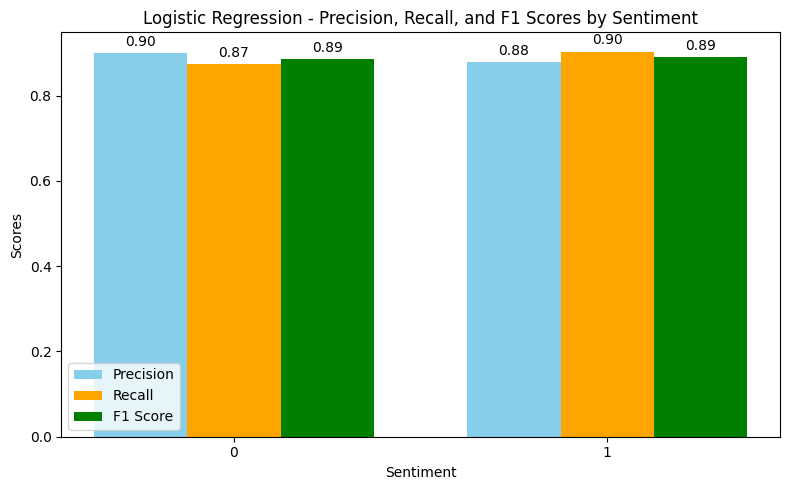

In [16]:

y_pred = lr.predict(X_test)

report = classification_report(test_labels, y_pred, output_dict=True)

categories = list(report.keys())[:2]
precision = [report[cat]['precision'] for cat in categories]
recall = [report[cat]['recall'] for cat in categories]
f1_score = [report[cat]['f1-score'] for cat in categories]

x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
bars2 = ax.bar(x, recall, width, label='Recall', color='orange')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='green')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression - Precision, Recall, and F1 Scores by Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

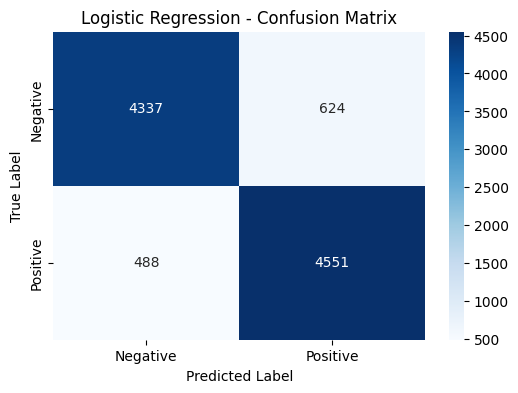

In [17]:
conf_matrix = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()